# **Laboratorio N°4: Número de Condición**


In [38]:
import numpy as np
import matplotlib.pyplot as plt

## Ejercicio 1

En este ejercicio vamos a probar o refutar algunas propiedades sobre el numero de condicion.
En cada item tendremos un propiedad que puede ser verdadera o falsa.
 - En caso de ser verdadera: dar su demostracion.
 - En caso de ser falsa: utilizar numpy para dar un contraejemplo.

Utilizar el comando `np.linalg.cond`.

**(a)** $Cond_2(A)$ + $Cond_2(B)$ = $Cond_2(A+B)$

In [39]:
A = np.array([[1,2,3],
            [4,6,6],
            [9,9,9]])
B = np.eye(3)
condA = np.linalg.cond(A,2)
condB = np.linalg.cond(B,2)
print(condA)
print(condB)
condAmasCondB = condA + condB
C = A + B
condC = np.linalg.cond(C,2)
print('Cond2(A) + Cond2(B) = {}, Cond2(A+B) = {}'.format(condAmasCondB, condC))

34.19207758344411
1.0
Cond2(A) + Cond2(B) = 35.19207758344411, Cond2(A+B) = 32.83444384991311


**(b)** $Cond_1(A)$ - $Cond_1(B)$ = $Cond_2(A-B)$

In [40]:
A = np.array([[1,2,3],
            [4,6,6],
            [9,9,9]])
B = np.eye(3)
condA = np.linalg.cond(A,1)
condB = np.linalg.cond(B,1)
print(condA)
print(condB)
condAmasCondB = condA - condB
C = A - B
condC = np.linalg.cond(C,1)
print('Cond2(A) - Cond2(B) = {}, Cond2(A-B) = {}'.format(condAmasCondB, condC))

36.0
1.0
Cond2(A) - Cond2(B) = 35.0, Cond2(A-B) = 55.99999999999999


**(c)** $Cond_2(A)$ * $Cond_2(B)$ = $Cond_2(A.B)$

In [41]:
A = np.array([[1,2,3],
            [4,6,6],
            [9,9,9]])
B = np.array([[1,2,3],
            [4,6,6],
            [9,9,9]])
condA = np.linalg.cond(A,2)
condB = np.linalg.cond(B,2)
print(condA)
print(condB)
condAmasCondB = condA * condB
C = A @ B
condC = np.linalg.cond(C,2)
print('Cond2(A) * Cond2(B) = {}, Cond2(A*B) = {}'.format(condAmasCondB, condC))

34.19207758344411
34.19207758344411
Cond2(A) * Cond2(B) = 1169.0981694722611, Cond2(A*B) = 873.346999898638


## Ejercicio 2

El objetivo de este ejercicio es estudiar el número de condición de
algunas matrices a medida que su tamaño aumenta.



**(a)** Programar funciones que, dado $n \in \mathbb{N}$, devuelvan las siguientes matrices de $\mathbb{R}^{n\times n}$. La función que define $B_n$ ya viene dada.


\begin{equation*}
A_n=
\begin{pmatrix}
\frac{1}{n} & 0 & 0 & \cdots  & n^2\\
0 & \frac{1}{n} & 0 & \cdots & 0 \\
0 & 0 & \frac{1}{n} & \cdots & 0\\
\vdots & \vdots & \vdots  & \ddots & \vdots\\
1 & 0 & 0 & \cdots &  \frac{1}{n}\\
\end{pmatrix}
\qquad
B_n=
\begin{pmatrix}
4 & 1 & 0 & \cdots & 0 & 0\\
1 & 4 & 1 & \cdots & 0 & 0 \\
0 & 1 & 4 & \ddots &  & \vdots\\
\vdots & \vdots & \ddots & \ddots & \ddots & \vdots \\
0 & 0 &  & \ddots & 4 & 1\\
0 & 0 & \cdots & \cdots & 1 & 4 \\
\end{pmatrix}
\qquad
H_n=
\begin{pmatrix}
1 & \frac{1}{2} & \frac{1}{3} & \cdots  & \frac{1}{n}\\
\frac{1}{2} & \frac{1}{3} & \frac{1}{4} & \cdots & \frac{1}{n+1} \\
\frac{1}{3} & \frac{1}{4} & \frac{1}{5} & \cdots & \frac{1}{n+2}\\
\vdots & \vdots & \vdots  & \ddots & \vdots\\
\frac{1}{n} & \frac{1}{n+1} & \cdots & \cdots &  \frac{1}{2n-1}\\
\end{pmatrix}
\end{equation*}



**Sugerencia:** Utilizar la función `np.diag` que recibe un array de números y genera una matriz diagonal con elementos dados por el array.




In [42]:
def matriz_B(n):
  B = np.eye(n, k=-1) + 4*np.eye(n, k=0) + np.eye(n, k=1)
  return B

def matriz_A(n):
    A = 1/n*np.eye(n)
    A[0,n-1] = n**2
    A[n-1,0] = 1
    return A

def matriz_H(n):
    H = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            H[i,j] = 1/(i+j+1)
    return H

**(b)** Graficar para 100 vectores **unitarios** (en norma 2), $v\in\mathbb{R^2}$, $\; A_2v,\ B_2v,\ H_2v$

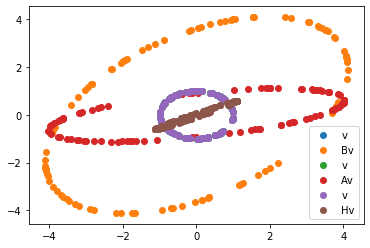

In [47]:
B = matriz_B(2)
V = np.random.rand(2, 100) - 0.5
V = V / np.linalg.norm(V, axis = 0)
BV = B @ V
plt.scatter(V[0], V[1], label = "v")
plt.scatter(BV[0], BV[1], label = "Bv")
plt.legend()

A = matriz_A(2)
AV = A @ V
plt.scatter(V[0], V[1], label = "v")
plt.scatter(AV[0], AV[1], label = "Av")
plt.legend()

H = matriz_H(2)
HV = H @ V
plt.scatter(V[0], V[1], label = "v")
plt.scatter(HV[0], HV[1], label = "Hv")
plt.legend()

**(c)** Programar una función que, dada una matriz $M_n$ y un número natural $N$, guarde en un vector el valor de $Cond_2(M_n)$ para $1\leq n \leq N$.

In [66]:
def vector_condicion(M, N):
    vecCond = np.zeros(N)
    for i in range(N-1, 0, -1):
        vecCond[i] = np.linalg.cond(M)
        M = np.delete(M, i, 1)
        M = np.delete(M, i, 0)
    return vecCond

B = matriz_B(4)
print(vector_condicion(B,4))

[0.         1.66666667 2.09383632 2.35857017]


**(d)** Realizar gráficos del número de condición en norma 2 de las matrices definidas arriba para $N=10$.


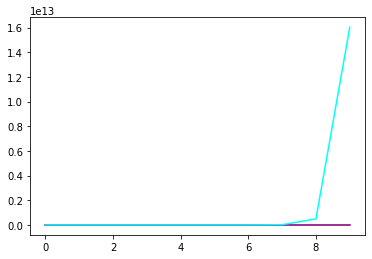

In [91]:
x= np.arange(0,10)
y1= vector_condicion(matriz_A(10), 10)
y2= vector_condicion(matriz_B(10), 10)
y3= vector_condicion(matriz_H(10), 10)

plt.plot(x, y1, color = 'pink')
plt.plot(x, y2, color = 'purple')
plt.plot(x, y3, color = 'cyan')
plt.show()

**Sugerencia:** Si es necesario, utilizar una escala logarítmica en el eje $y$.

**(e)** Repetir el ítem (c) para la matriz de Hilbert con $N=50$. ¿Cómo se explica el comportamiento observado?

In [72]:
B = matriz_H(50)
print(vector_condicion(B,50))

[0.00000000e+00 1.92814701e+01 5.24056778e+02 1.55137387e+04
 4.76607250e+05 1.49510586e+07 4.75367357e+08 1.52575755e+10
 4.93153756e+11 1.60244170e+13 5.22270132e+14 1.75159523e+16
 3.18839507e+18 6.20078628e+17 3.67568287e+17 7.04638995e+17
 1.24901004e+18 2.24776429e+18 6.47270091e+18 1.14840204e+18
 3.29024282e+18 1.09363822e+19 6.31377900e+17 2.16084283e+18
 1.33091975e+18 5.82507781e+18 4.41467036e+18 5.88905000e+18
 8.06027413e+18 5.51269130e+18 2.40408173e+19 4.15019503e+18
 1.17052373e+19 4.56520145e+18 2.55241961e+19 4.33812500e+18
 5.87171886e+18 2.56306235e+19 9.05852545e+18 6.58430266e+18
 1.05237693e+20 2.69420221e+19 3.89169879e+19 6.21742730e+19
 1.17573486e+19 1.57000450e+19 1.25606524e+19 6.71565889e+18
 6.14545925e+18 2.37563255e+19]


## Ejercicio 3 (Ej 20 - Práctica 2)

Sea
$A=\left(
\begin{array}{ccc}
3&0 & 0\\
0& \frac 54 & \frac 34\\
0& \frac 34 & \frac 54\\
\end{array}
\right).$



In [ ]:
A = np.array([[3.0, 0, 0], [0, 5/4, 3/4], [0, 3/4, 4/5]])

(a) Calcular $Cond_\infty(A)$.


In [83]:
print(np.linalg.cond(A, np.inf))

5.3999999999999995


(b) ¿Cuán chico debe ser el error relativo en los datos, $\frac{\|b-\tilde{b}\|}{\|b\|}$, si se desea que el error relativo en la aproximación de la solución, $\frac{\|x-\tilde{x}\|}{\|x\|}, $ sea menor que $10^{-4}$ (en $\|\cdot\|_{\infty}$)?



In [ ]:
#COMPLETAR

(c) Realizar experimentos numéricos para verificar las estimaciones del ítem anterior. Considerar $b=(3,2,2)^t$, que se corresponde con la solución exacta $x=(1,1,1)^t$. Generar vectores de error aleatorios, normalizarlos para que su norma sea tan chica como la estimada en el item anterior y perturbar $b$ obteniendo $\tilde{b}$. Finalmente, resolver $A\tilde{x}=\tilde{b}$ y verificar que $\|\tilde{x}-x\|<10^{-4}$.

In [ ]:
#COMPLETAR